In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define the model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc = nn.Linear(1, 1)

    def forward(self, x):
        return self.fc(x)

In [3]:
# Define custom loss function
class SquaredHingeLoss(nn.Module):
    def __init__(self, margin=1):
        super(SquaredHingeLoss, self).__init__()
        self.margin = margin

    def forward(self, predicted, y):
        low, high = y[:, 0], y[:, 1]
        margin = self.margin
        loss_low = torch.relu(low - predicted + margin)
        loss_high = torch.relu(predicted - high + margin)
        loss = loss_low + loss_high
        return torch.mean(torch.square(loss))

In [23]:
# Training data
features = torch.tensor([[1.], [2.], [3.], [4.], [5.]])
targets  = torch.tensor([[1., 1.5], [1.5, 2.], [2.5, 2.7], [4.5, 6.], [9., 10]])

# Create DataLoader
dataset    = TensorDataset(features, targets)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

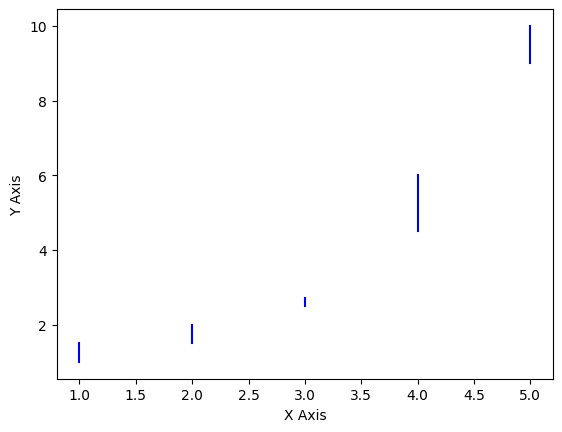

In [24]:
# Plotting
for i, (lower, upper) in enumerate(targets.numpy() ):
    plt.plot([features.numpy()[i], features.numpy()[i]], [lower, upper], color='b')

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

In [26]:
# Instantiate model and loss function
model = Model()
criterion = SquaredHingeLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Training loop
epochs = 1000
for epoch in range(epochs):
    total_loss = 0
    for inputs, labels in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(dataloader):.4f}')

Epoch [100/1000], Loss: 4.7749
Epoch [200/1000], Loss: 4.3358
Epoch [300/1000], Loss: 3.9541
Epoch [400/1000], Loss: 3.6246
Epoch [500/1000], Loss: 3.4708
Epoch [600/1000], Loss: 3.3608
Epoch [700/1000], Loss: 3.3322
Epoch [800/1000], Loss: 3.3326
Epoch [900/1000], Loss: 3.3304
Epoch [1000/1000], Loss: 3.3313


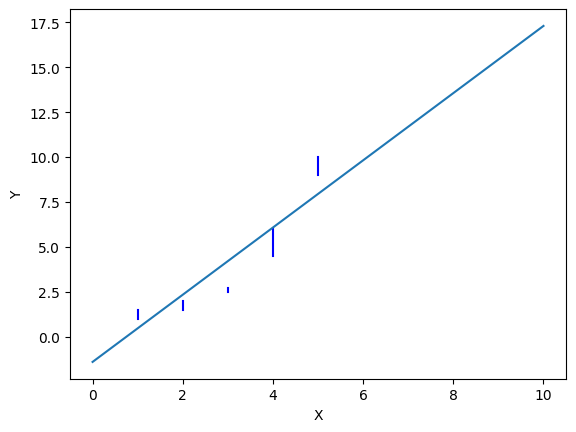

In [27]:
# Test the trained model
test_inputs = np.arange(11)
with torch.no_grad():
    test_input = torch.Tensor(test_inputs).reshape(-1,1)
    predicted  = model(test_input)

# Plot
for i, (lower, upper) in enumerate(targets.numpy() ):
    plt.plot([features.numpy()[i], features.numpy()[i]], [lower, upper], color='b')
plt.plot(test_inputs, predicted.numpy())
plt.xlabel('X')
plt.ylabel('Y')
plt.show()